In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import re

In [3]:
# set parameters
np.random.seed(0)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
data_dir = "C:/Users/Filip/Desktop/PW/2 semestr/Deep Learning/pro1"

batch_size = 1
epochs = 15

steps_per_epoch = 90000
steps_per_epoch = min(steps_per_epoch, 90000/batch_size)

In [61]:
x_batch, y_batch = next(train_generator)
print(f"Feature batch shape: {x_batch.shape}")
print(f"Label batch shape: {y_batch.shape}")


Feature batch shape: (1, 32, 32, 3)
Label batch shape: (1, 10)


In [4]:
# create generators for the training and test sets

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    
)
train_generator = datagen.flow_from_directory(
    data_dir + "/train",
    target_size=(32, 32),  # Resize images to this size
    batch_size=1,  # Number of images to load at each iteration
    class_mode="categorical",
)  # Type of classification ('binary' or 'categorical')

test_generator = datagen.flow_from_directory(
    data_dir + "/test",
    target_size=(32, 32),
    batch_size=1,
    class_mode="categorical",
)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


IndexError: index 1 is out of bounds for axis 0 with size 1

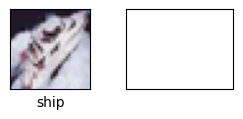

In [58]:
# # check if images are properly loaded
images, labels = next(train_generator)

# Plot the first 16 images of the batch
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    # Assuming 'classes' is a list of class names in the order they are indexed by the generator
    # Decode the one-hot encoded labels to find the class index, then get the class name
    plt.xlabel(classes[labels[i].argmax()])

plt.show()

In [28]:
# create cnn model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))


model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [62]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])


In [19]:
model = create_model(learning_rate=0.001)

In [63]:
# fit model
history_1 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
90000/90000 [==============================] - 939s 10ms/step - loss: 2.2804 - accuracy: 0.1311 - val_loss: 34.4492 - val_accuracy: 0.0998
Epoch 2/20
90000/90000 [==============================] - 921s 10ms/step - loss: 2.2414 - accuracy: 0.1506 - val_loss: 334.2846 - val_accuracy: 0.1004
Epoch 3/20
90000/90000 [==============================] - 924s 10ms/step - loss: 2.2229 - accuracy: 0.1637 - val_loss: 417.4479 - val_accuracy: 0.1209
Epoch 4/20
90000/90000 [==============================] - 925s 10ms/step - loss: 2.2128 - accuracy: 0.1692 - val_loss: 269.0441 - val_accuracy: 0.1312
Epoch 5/20
90000/90000 [==============================] - 928s 10ms/step - loss: 2.2081 - accuracy: 0.1705 - val_loss: 317.0161 - val_accuracy: 0.1285
Epoch 6/20
90000/90000 [==============================] - 930s 10ms/step - loss: 2.1994 - accuracy: 0.1722 - val_loss: 459.9209 - val_accuracy: 0.1121
Epoch 7/20
90000/90000 [==============================] - 935s 10ms/step - loss: 2.1988 - accur

In [10]:
import re

def extract_training_metrics(training_log):
    # Regular expressions for each metric
    loss_pattern = r" - loss: (\d+\.\d+)"
    accuracy_pattern = r" - accuracy: (\d+\.\d+)"
    val_loss_pattern = r"val_loss: (\d+\.\d+)"
    val_accuracy_pattern = r"val_accuracy: (\d+\.\d+)"

    # Extracting all occurrences of each metric
    losses = [float(loss) for loss in re.findall(loss_pattern, training_log)]
    accuracies = [float(acc) for acc in re.findall(accuracy_pattern, training_log)]
    val_losses = [float(val_loss) for val_loss in re.findall(val_loss_pattern, training_log)]
    val_accuracies = [float(val_acc) for val_acc in re.findall(val_accuracy_pattern, training_log)]

    return losses, accuracies, val_losses, val_accuracies

sample_string = """Epoch 1/20
90000/90000 [==============================] - 939s 10ms/step - loss: 2.2804 - accuracy: 0.1311 - val_loss: 34.4492 - val_accuracy: 0.0998
Epoch 2/20
90000/90000 [==============================] - 921s 10ms/step - loss: 2.2414 - accuracy: 0.1506 - val_loss: 334.2846 - val_accuracy: 0.1004
Epoch 3/20
90000/90000 [==============================] - 924s 10ms/step - loss: 2.2229 - accuracy: 0.1637 - val_loss: 417.4479 - val_accuracy: 0.1209
Epoch 4/20
90000/90000 [==============================] - 925s 10ms/step - loss: 2.2128 - accuracy: 0.1692 - val_loss: 269.0441 - val_accuracy: 0.1312
Epoch 5/20
90000/90000 [==============================] - 928s 10ms/step - loss: 2.2081 - accuracy: 0.1705 - val_loss: 317.0161 - val_accuracy: 0.1285
Epoch 6/20
90000/90000 [==============================] - 930s 10ms/step - loss: 2.1994 - accuracy: 0.1722 - val_loss: 459.9209 - val_accuracy: 0.1121
Epoch 7/20
90000/90000 [==============================] - 935s 10ms/step - loss: 2.1988 - accuracy: 0.1744 - val_loss: 695.7227 - val_accuracy: 0.1059
Epoch 8/20
90000/90000 [==============================] - 929s 10ms/step - loss: 2.1944 - accuracy: 0.1789 - val_loss: 897.8064 - val_accuracy: 0.1008
Epoch 9/20
90000/90000 [==============================] - 932s 10ms/step - loss: 2.1900 - accuracy: 0.1800 - val_loss: 705.7185 - val_accuracy: 0.1049
Epoch 10/20
90000/90000 [==============================] - 936s 10ms/step - loss: 2.1937 - accuracy: 0.1750 - val_loss: 606.1667 - val_accuracy: 0.1068
Epoch 11/20
90000/90000 [==============================] - 936s 10ms/step - loss: 2.1884 - accuracy: 0.1774 - val_loss: 307.9769 - val_accuracy: 0.0887
Epoch 12/20
90000/90000 [==============================] - 938s 10ms/step - loss: 2.1730 - accuracy: 0.1845 - val_loss: 1169.8419 - val_accuracy: 0.1052
Epoch 13/20
90000/90000 [==============================] - 943s 10ms/step - loss: 2.1631 - accuracy: 0.1894 - val_loss: 1174.5707 - val_accuracy: 0.0983
Epoch 14/20
90000/90000 [==============================] - 940s 10ms/step - loss: 2.1575 - accuracy: 0.1924 - val_loss: 966.7503 - val_accuracy: 0.0880
Epoch 15/20
90000/90000 [==============================] - 942s 10ms/step - loss: 2.1544 - accuracy: 0.1928 - val_loss: 1786.8651 - val_accuracy: 0.0835
Epoch 16/20
90000/90000 [==============================] - 947s 11ms/step - loss: 2.1443 - accuracy: 0.2012 - val_loss: 2412.5425 - val_accuracy: 0.0810
Epoch 17/20
90000/90000 [==============================] - 948s 11ms/step - loss: 2.1381 - accuracy: 0.2030 - val_loss: 4011.2725 - val_accuracy: 0.0697
Epoch 18/20
90000/90000 [==============================] - 950s 11ms/step - loss: 2.1195 - accuracy: 0.2125 - val_loss: 1257.6715 - val_accuracy: 0.0722
Epoch 19/20
90000/90000 [==============================] - 947s 11ms/step - loss: 2.1298 - accuracy: 0.2099 - val_loss: 1753.8983 - val_accuracy: 0.0729
Epoch 20/20
90000/90000 [==============================] - 935s 10ms/step - loss: 2.1096 - accuracy: 0.2167 - val_loss: 2650.0061 - val_accuracy: 0.0802 """
losses_1, accuracies_1, val_losses_1, val_accuracies_1 = extract_training_metrics(sample_string)


In [12]:
val_accuracies_1

[0.0998,
 0.1004,
 0.1209,
 0.1312,
 0.1285,
 0.1121,
 0.1059,
 0.1008,
 0.1049,
 0.1068,
 0.0887,
 0.1052,
 0.0983,
 0.088,
 0.0835,
 0.081,
 0.0697,
 0.0722,
 0.0729,
 0.0802]

In [72]:
history_1

In [64]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [65]:
# fit model
history_2 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
90000/90000 [==============================] - 896s 10ms/step - loss: 2.2517 - accuracy: 0.1559 - val_loss: 3.6155 - val_accuracy: 0.1318
Epoch 2/20
90000/90000 [==============================] - 897s 10ms/step - loss: 2.0865 - accuracy: 0.2284 - val_loss: 5.5145 - val_accuracy: 0.1499
Epoch 3/20
90000/90000 [==============================] - 897s 10ms/step - loss: 1.9980 - accuracy: 0.2603 - val_loss: 7.5098 - val_accuracy: 0.1428
Epoch 4/20
90000/90000 [==============================] - 897s 10ms/step - loss: 1.9465 - accuracy: 0.2795 - val_loss: 11.0256 - val_accuracy: 0.1165
Epoch 5/20
90000/90000 [==============================] - 899s 10ms/step - loss: 1.9092 - accuracy: 0.2956 - val_loss: 40.5142 - val_accuracy: 0.1154
Epoch 6/20
90000/90000 [==============================] - 902s 10ms/step - loss: 1.8857 - accuracy: 0.3058 - val_loss: 20.0037 - val_accuracy: 0.1355
Epoch 7/20
90000/90000 [==============================] - 902s 10ms/step - loss: 1.8569 - accuracy: 0.3

In [13]:
import re

def extract_training_metrics(training_log):
    # Regular expressions for each metric
    loss_pattern = r" - loss: (\d+\.\d+)"
    accuracy_pattern = r" - accuracy: (\d+\.\d+)"
    val_loss_pattern = r"val_loss: (\d+\.\d+)"
    val_accuracy_pattern = r"val_accuracy: (\d+\.\d+)"

    # Extracting all occurrences of each metric
    losses = [float(loss) for loss in re.findall(loss_pattern, training_log)]
    accuracies = [float(acc) for acc in re.findall(accuracy_pattern, training_log)]
    val_losses = [float(val_loss) for val_loss in re.findall(val_loss_pattern, training_log)]
    val_accuracies = [float(val_acc) for val_acc in re.findall(val_accuracy_pattern, training_log)]

    return losses, accuracies, val_losses, val_accuracies

sample_string = """Epoch 1/20
Epoch 1/20
90000/90000 [==============================] - 896s 10ms/step - loss: 2.2517 - accuracy: 0.1559 - val_loss: 3.6155 - val_accuracy: 0.1318
Epoch 2/20
90000/90000 [==============================] - 897s 10ms/step - loss: 2.0865 - accuracy: 0.2284 - val_loss: 5.5145 - val_accuracy: 0.1499
Epoch 3/20
90000/90000 [==============================] - 897s 10ms/step - loss: 1.9980 - accuracy: 0.2603 - val_loss: 7.5098 - val_accuracy: 0.1428
Epoch 4/20
90000/90000 [==============================] - 897s 10ms/step - loss: 1.9465 - accuracy: 0.2795 - val_loss: 11.0256 - val_accuracy: 0.1165
Epoch 5/20
90000/90000 [==============================] - 899s 10ms/step - loss: 1.9092 - accuracy: 0.2956 - val_loss: 40.5142 - val_accuracy: 0.1154
Epoch 6/20
90000/90000 [==============================] - 902s 10ms/step - loss: 1.8857 - accuracy: 0.3058 - val_loss: 20.0037 - val_accuracy: 0.1355
Epoch 7/20
90000/90000 [==============================] - 902s 10ms/step - loss: 1.8569 - accuracy: 0.3185 - val_loss: 44.6779 - val_accuracy: 0.1428
Epoch 8/20
90000/90000 [==============================] - 903s 10ms/step - loss: 1.8485 - accuracy: 0.3232 - val_loss: 36.1802 - val_accuracy: 0.1296
Epoch 9/20
90000/90000 [==============================] - 904s 10ms/step - loss: 1.8371 - accuracy: 0.3281 - val_loss: 79.4255 - val_accuracy: 0.1235
Epoch 10/20
90000/90000 [==============================] - 907s 10ms/step - loss: 1.8261 - accuracy: 0.3318 - val_loss: 219.9134 - val_accuracy: 0.1289
Epoch 11/20
90000/90000 [==============================] - 909s 10ms/step - loss: 1.8051 - accuracy: 0.3402 - val_loss: 450.5133 - val_accuracy: 0.1229
Epoch 12/20
90000/90000 [==============================] - 907s 10ms/step - loss: 1.7983 - accuracy: 0.3444 - val_loss: 267.1702 - val_accuracy: 0.1531
Epoch 13/20
90000/90000 [==============================] - 910s 10ms/step - loss: 1.7970 - accuracy: 0.3456 - val_loss: 758.7103 - val_accuracy: 0.1468
Epoch 14/20
90000/90000 [==============================] - 913s 10ms/step - loss: 1.7917 - accuracy: 0.3452 - val_loss: 567.5264 - val_accuracy: 0.1735
Epoch 15/20
90000/90000 [==============================] - 924s 10ms/step - loss: 1.7763 - accuracy: 0.3532 - val_loss: 354.3228 - val_accuracy: 0.1531
Epoch 16/20
90000/90000 [==============================] - 926s 10ms/step - loss: 1.7785 - accuracy: 0.3534 - val_loss: 2355.3987 - val_accuracy: 0.1420
Epoch 17/20
90000/90000 [==============================] - 927s 10ms/step - loss: 1.7725 - accuracy: 0.3522 - val_loss: 710.9120 - val_accuracy: 0.1539
Epoch 18/20
90000/90000 [==============================] - 929s 10ms/step - loss: 1.7621 - accuracy: 0.3576 - val_loss: 741.8717 - val_accuracy: 0.1637
Epoch 19/20
90000/90000 [==============================] - 933s 10ms/step - loss: 1.7534 - accuracy: 0.3600 - val_loss: 1153.1427 - val_accuracy: 0.1540
Epoch 20/20
90000/90000 [==============================] - 936s 10ms/step - loss: 1.7524 - accuracy: 0.3633 - val_loss: 758.1198 - val_accuracy: 0.1685 """
losses_2, accuracies_2, val_losses_2, val_accuracies_2 = extract_training_metrics(sample_string)


In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])


In [9]:
# fit model
history_4 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
90000/90000 [==============================] - 909s 10ms/step - loss: 2.2616 - accuracy: 0.1381 - val_loss: 3.5949 - val_accuracy: 0.1083
Epoch 2/20
90000/90000 [==============================] - 866s 10ms/step - loss: 2.2203 - accuracy: 0.1604 - val_loss: 6.3625 - val_accuracy: 0.1211
Epoch 3/20
90000/90000 [==============================] - 872s 10ms/step - loss: 2.2008 - accuracy: 0.1731 - val_loss: 202.4351 - val_accuracy: 0.1097
Epoch 4/20
90000/90000 [==============================] - 871s 10ms/step - loss: 2.1910 - accuracy: 0.1790 - val_loss: 91.6250 - val_accuracy: 0.1255
Epoch 5/20
90000/90000 [==============================] - 871s 10ms/step - loss: 2.1736 - accuracy: 0.1896 - val_loss: 78.1899 - val_accuracy: 0.1389
Epoch 6/20
90000/90000 [==============================] - 875s 10ms/step - loss: 2.1649 - accuracy: 0.1949 - val_loss: 272.7654 - val_accuracy: 0.1273
Epoch 7/20
90000/90000 [==============================] - 875s 10ms/step - loss: 2.1640 - accuracy: 

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])


In [6]:
# fit model
history_3 = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
90000/90000 [==============================] - 879s 10ms/step - loss: 2.4517 - accuracy: 0.1130 - val_loss: 2.3499 - val_accuracy: 0.1572
Epoch 2/20
90000/90000 [==============================] - 866s 10ms/step - loss: 2.2386 - accuracy: 0.1502 - val_loss: 2.3701 - val_accuracy: 0.1798
Epoch 3/20
90000/90000 [==============================] - 838s 9ms/step - loss: 2.1624 - accuracy: 0.1895 - val_loss: 2.4396 - val_accuracy: 0.1857
Epoch 4/20
90000/90000 [==============================] - 869s 10ms/step - loss: 2.0902 - accuracy: 0.2151 - val_loss: 2.6581 - val_accuracy: 0.1762
Epoch 5/20
90000/90000 [==============================] - 892s 10ms/step - loss: 2.0097 - accuracy: 0.2431 - val_loss: 3.0735 - val_accuracy: 0.1639
Epoch 6/20
90000/90000 [==============================] - 879s 10ms/step - loss: 1.9378 - accuracy: 0.2684 - val_loss: 3.7404 - val_accuracy: 0.1588
Epoch 7/20
90000/90000 [==============================] - 854s 9ms/step - loss: 1.8820 - accuracy: 0.2897 -

In [7]:
history_3

In [ ]:

# Plotting training and validation loss
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
axs[0].plot(history_1.history['loss'], label='Training Loss')
axs[0].plot(history_1.history['val_loss'], label='Validation Loss')
axs[0].set_title(f'Training and Validation Loss for Batch Size = {batch_size}, Epochs = {epochs}')
axs[0].set_xlabel('Batch nr.')
axs[0].set_ylabel('Loss')

# Plot training and validation accuracy
axs[1].plot(history_1.history['accuracy'], label='Training Accuracy')
axs[1].plot(history_1.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Batch nr.')
axs[1].set_ylabel('Accuracy')

axs[0].legend()
axs[1].legend()


In [97]:
# function for auto saving new models
def save_model_with_version(model, accuracy, base_path="models/cnn/"):
    pattern = r"v(\d+)"  # Regex to find version numbers
    max_version = 0
    
    # Check for existing models and find the highest version number
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    for filename in os.listdir(os.path.dirname(base_path)):
        match = re.search(pattern, filename)
        if match:
            version = int(match.group(1))
            max_version = max(max_version, version)
    
    # Increment the version for the new model
    new_version = max_version + 1
    model_path = f"{base_path}cnn_v{new_version}_{round(accuracy,4)}.model"
    
    # Save the model
    model.save(model_path)
    print(f"Model saved as {model_path}")

In [98]:
#evaluate and save model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy}")

save_model_with_version(model, accuracy)

1407/1407 [==============================] - 23s 16ms/step - loss: 1.5291 - accuracy: 0.4373
Loss: 1.5291271209716797, Accuracy: 0.4373222291469574
INFO:tensorflow:Assets written to: models/cnn/cnn_v4_0.4373222291469574.model/assets


INFO:tensorflow:Assets written to: models/cnn/cnn_v4_0.4373222291469574.model/assets


Model saved as models/cnn/cnn_v4_0.4373222291469574.model


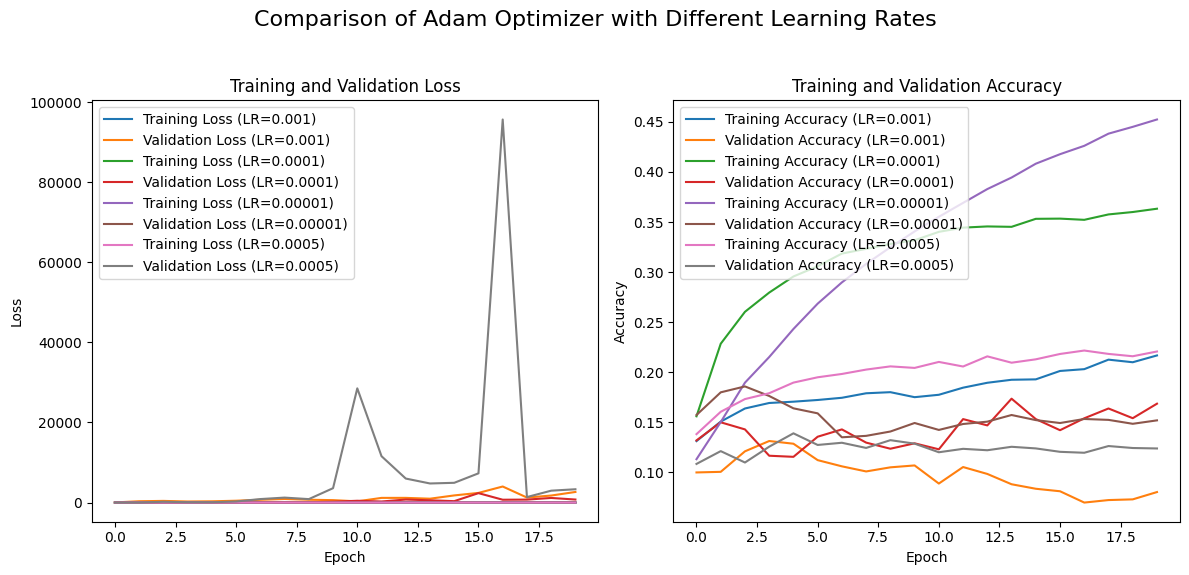

In [17]:
import matplotlib.pyplot as plt
# Plotting training and validation loss
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for history_1
axs[0].plot(losses_1, label='Training Loss (LR=0.001)')
axs[0].plot(val_losses_1, label='Validation Loss (LR=0.001)')
axs[1].plot(accuracies_1, label='Training Accuracy (LR=0.001)')
axs[1].plot(val_accuracies_1, label='Validation Accuracy (LR=0.001)')

# Plot for history_2
axs[0].plot(losses_2, label='Training Loss (LR=0.0001)')
axs[0].plot(val_losses_2, label='Validation Loss (LR=0.0001)')
axs[1].plot(accuracies_2, label='Training Accuracy (LR=0.0001)')
axs[1].plot(val_accuracies_2, label='Validation Accuracy (LR=0.0001)')

# Plot for history_3
axs[0].plot(history_3.history['loss'], label='Training Loss (LR=0.00001)')
axs[0].plot(history_3.history['val_loss'], label='Validation Loss (LR=0.00001)')
axs[1].plot(history_3.history['accuracy'], label='Training Accuracy (LR=0.00001)')
axs[1].plot(history_3.history['val_accuracy'], label='Validation Accuracy (LR=0.00001)')

# Plot for history_4
axs[0].plot(history_4.history['loss'], label='Training Loss (LR=0.0005)')
axs[0].plot(history_4.history['val_loss'], label='Validation Loss (LR=0.0005)')
axs[1].plot(history_4.history['accuracy'], label='Training Accuracy (LR=0.0005)')
axs[1].plot(history_4.history['val_accuracy'], label='Validation Accuracy (LR=0.0005)')

# Set titles and labels
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')

# Add legends
axs[0].legend()
axs[1].legend()

# Set an overall title for the figure
fig.suptitle('Comparison of Adam Optimizer with Different Learning Rates', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


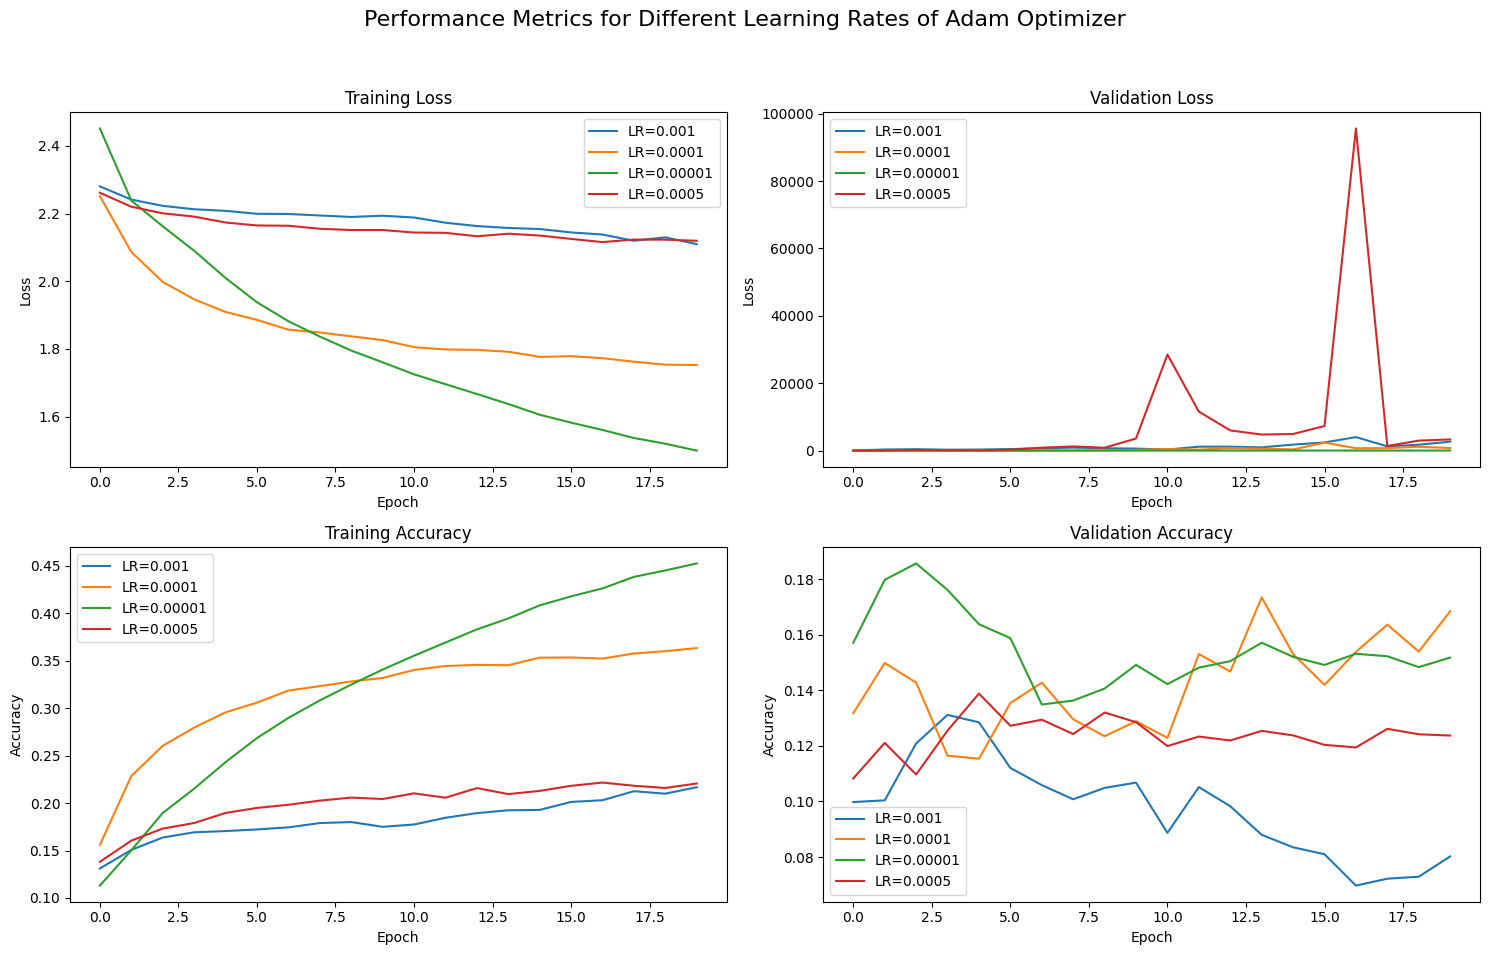

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
axs[0, 0].plot(losses_1, label='LR=0.001')
axs[0, 0].plot(losses_2, label='LR=0.0001')
axs[0, 0].plot(history_3.history['loss'], label='LR=0.00001')
axs[0, 0].plot(history_4.history['loss'], label='LR=0.0005')
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
axs[0, 1].plot(val_losses_1, label='LR=0.001')
axs[0, 1].plot(val_losses_2, label='LR=0.0001')
axs[0, 1].plot(history_3.history['val_loss'], label='LR=0.00001')
axs[0, 1].plot(history_4.history['val_loss'], label='LR=0.0005')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
axs[1, 0].plot(accuracies_1, label='LR=0.001')
axs[1, 0].plot(accuracies_2, label='LR=0.0001')
axs[1, 0].plot(history_3.history['accuracy'], label='LR=0.00001')
axs[1, 0].plot(history_4.history['accuracy'], label='LR=0.0005')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
axs[1, 1].plot(val_accuracies_1, label='LR=0.001')
axs[1, 1].plot(val_accuracies_2, label='LR=0.0001')
axs[1, 1].plot(history_3.history['val_accuracy'], label='LR=0.00001')
axs[1, 1].plot(history_4.history['val_accuracy'], label='LR=0.0005')
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different Learning Rates of Adam Optimizer', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

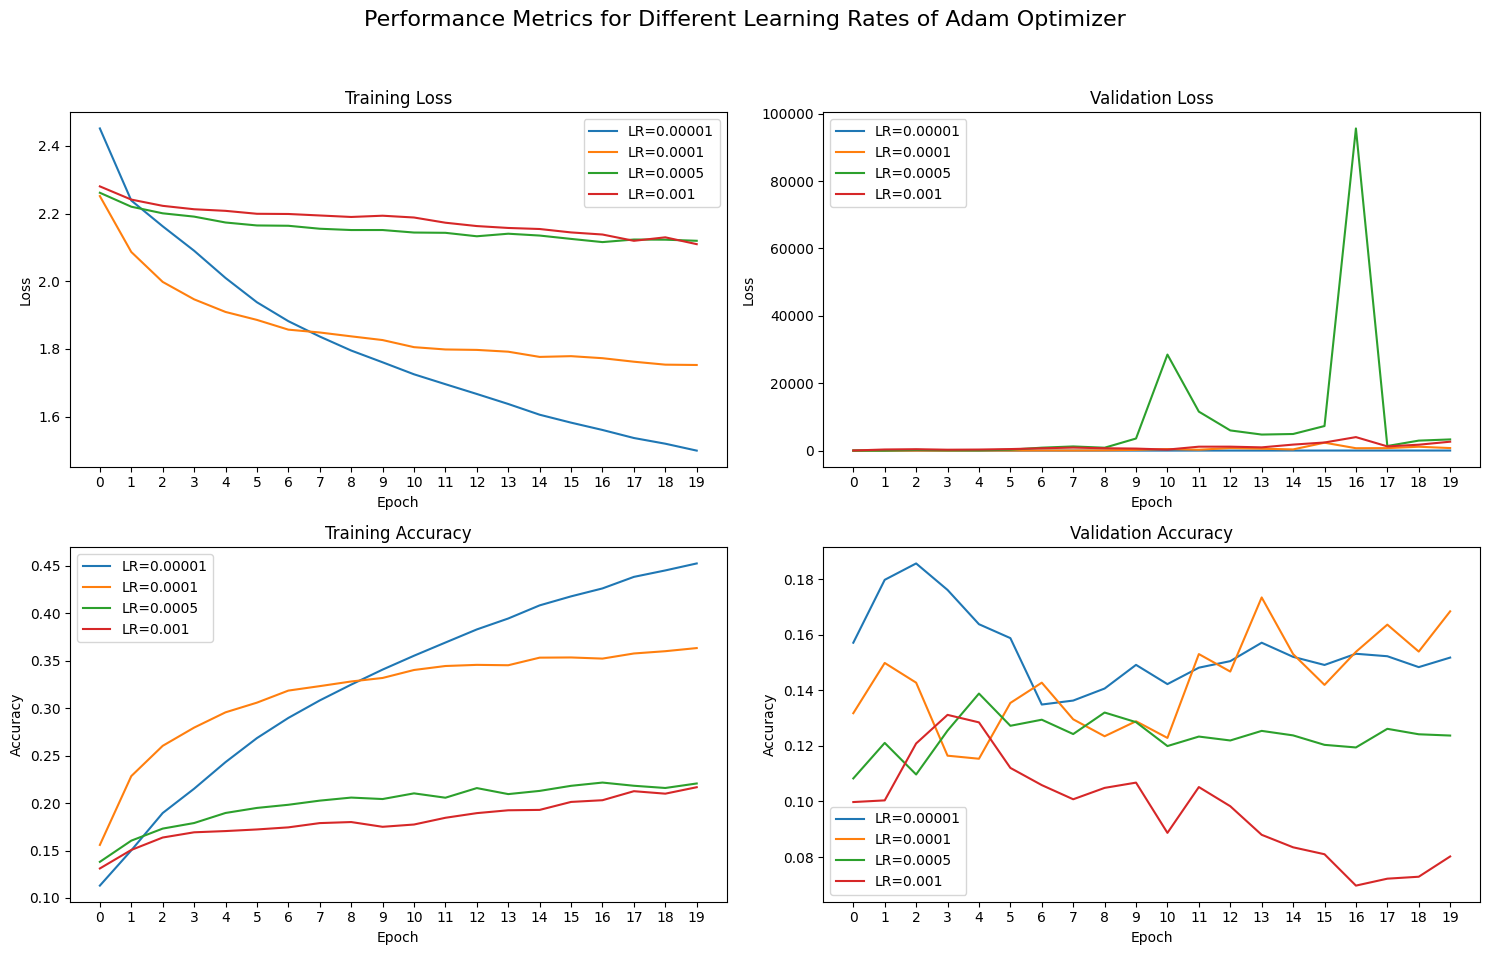

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Learning rates sorted in ascending order
learning_rates = ['0.00001', '0.0001', '0.0005', '0.001']

# Function to sort legends
def sort_legend(ax):
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: float(t[0].split('=')[1])))
    ax.legend(handles, labels)

# Plotting Training Loss
for lr, label in zip([history_3.history['loss'], losses_2, history_4.history['loss'], losses_1], learning_rates):
    axs[0, 0].plot(lr, label=f'LR={label}')
sort_legend(axs[0, 0])
axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')

# Plotting Validation Loss
for lr, label in zip([history_3.history['val_loss'], val_losses_2, history_4.history['val_loss'], val_losses_1], learning_rates):
    axs[0, 1].plot(lr, label=f'LR={label}')
sort_legend(axs[0, 1])
axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')

# Plotting Training Accuracy
for lr, label in zip([history_3.history['accuracy'], accuracies_2, history_4.history['accuracy'], accuracies_1], learning_rates):
    axs[1, 0].plot(lr, label=f'LR={label}')
sort_legend(axs[1, 0])
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')

# Plotting Validation Accuracy
for lr, label in zip([history_3.history['val_accuracy'], val_accuracies_2, history_4.history['val_accuracy'], val_accuracies_1], learning_rates):
    axs[1, 1].plot(lr, label=f'LR={label}')
sort_legend(axs[1, 1])
axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different Learning Rates of Adam Optimizer', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set x-ticks to clearly show 20 epochs
for ax in axs.flat:
    ax.set_xticks(range(0, 20))

plt.show()